# Matplotlib Settings

* 한글 폰트 설치: 
    ``` bash
    $ sudo add-apt-repository "deb http://dev.naver.com/repos deb/"
    $ sudo apt-get update
    $ sudo apt-get install fonts-nanum fonts-nanum-coding fonts-nanum-extra
    $ ll /usr/share/fonts/truetype/nanum/
    ```
* 한글 사용:
    ``` python
    plt.rcParams["font.family"] = 'NanumGothic'
    ```
* "\-" 표시 안될때:
    ``` python
    plt.rcParams["axes.unicode_minus"] = False
    ```
* grid 추가:
    ``` python
    ax.grid(axis='y', linestyle='-.')    
    ```
* x, y축 tick 크기 변경:
    ``` python
    ax.tick_params(labelsize=14)
    ```
* y축 tick 간격 설정:
    ``` python
    # 0~18까지 4씩 끊어서 표시
    ax.set_ybound(0, 18)    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(4))
    ```
* tick 설정:
    ``` python
    # labels는 보여지는 내용
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks_str)
    ```
* label 설정:
    ``` python
    # labelpad: axis, label 사이 간격
    ax.set_ylabel('월평균 발전시간 (시간)', fontsize=17, labelpad=20)
    ```
* figure 저장:
    ``` python
    import matplotlib.ticker as ticker
    # bbox_inches: If ‘tight’, try to figure out the tight bbox of the figure
    fig.savefig('figure/example1.png', bbox_inches='tight')
    ```
* plot marker:
    ``` python
    # 아래쪽 삼각형: (3, 0, 180)
    # linestyle: None이면 line표기 X
    ax.plot(xticks, yticks, color='red', marker=(3, 0, 180), linestyle='None')
    ```

In [1]:
from datetime import datetime, timedelta, date

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["axes.unicode_minus"] = False

## 사용할 데이터 전처리

In [2]:
df = pd.read_csv('data/data1.csv')
df['dt'] = df['dt'].apply(lambda x: pd.Timestamp(x))

In [3]:
df['year'] = df['dt'].apply(lambda x: x.year)
df['month'] = df['dt'].apply(lambda x: x.month)
df['day'] = df['dt'].apply(lambda x: x.date())

In [4]:
monthly = (df.groupby(['month', 'day'])[['trueYield', 'predictYield']].sum()/18).groupby(['month']).mean()

## Examples

### 1. plot

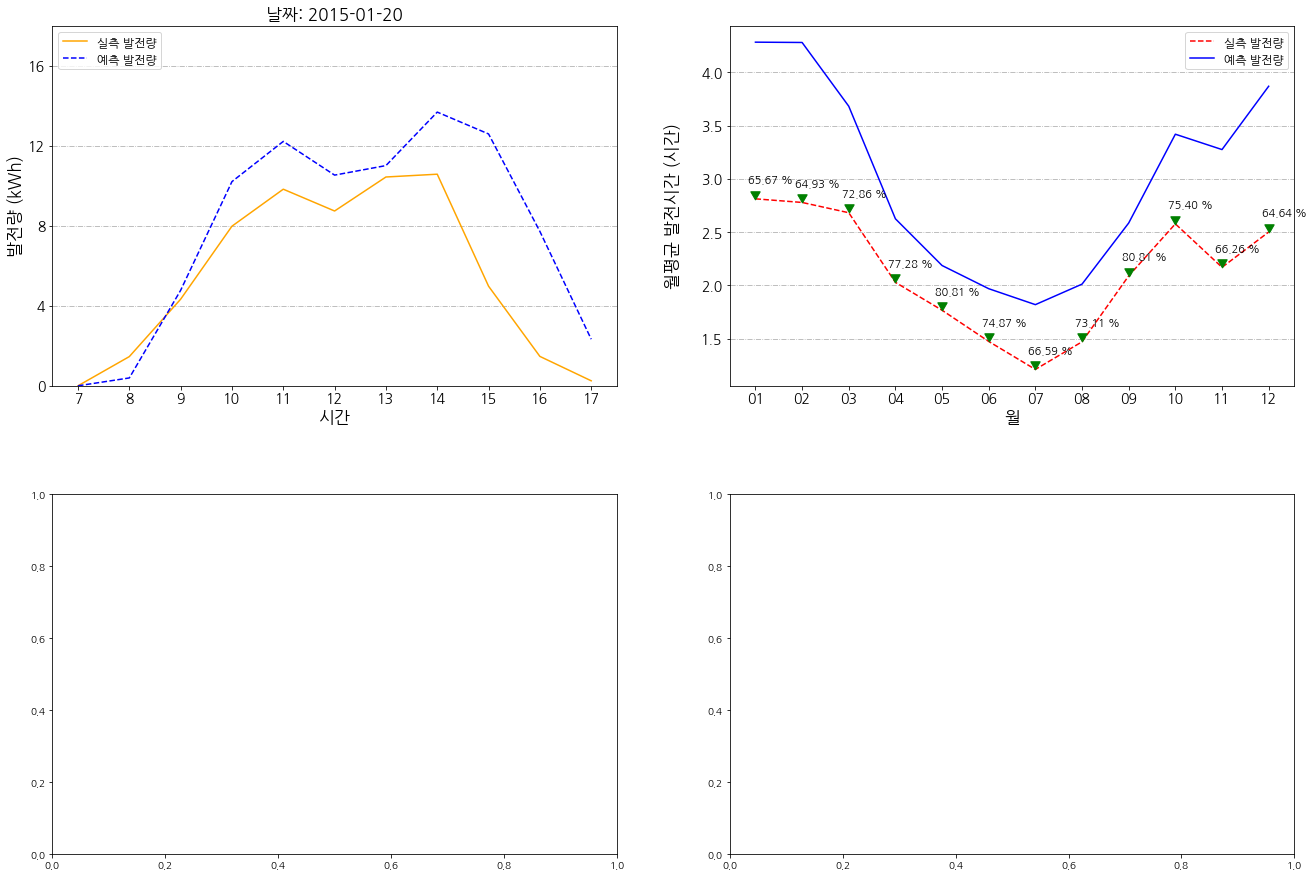

In [5]:
# 2x2 subplot
fig, axarr = plt.subplots(2, 2)

# ------------------------------------
# 1. 
# ------------------------------------
day = date(2015, 1, 20)
data = df[df['day'] == day].sort_values('dt')

xticks = data['dt'].apply(lambda x: x.hour)
yticks1 = data['trueYield']
yticks2 = data['predictYield']

ax = axarr[0, 0]
# grid 설정
ax.grid(axis='y', linestyle='-.')
# x, y축 폰트 크기
ax.tick_params(labelsize=14)

ax.plot(xticks, yticks1, color='orange', label='실측 발전량')
ax.plot(xticks, yticks2, color='blue', linestyle='--', label='예측 발전량')

# legend
ax.legend(loc=2, fontsize=12)

# x축 세팅
ax.set_xticks(xticks)
ax.set_xlabel('시간', fontsize=17)

# y축 세팅
ax.set_ylabel('발전량 (kWh)', fontsize=17)
ax.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax.set_ybound(0, 18)

ax.set_title('날짜: {}'.format(day), fontsize=17)

# ------------------------------------
# 2.
# ------------------------------------
xticks = range(12)
xticks_str = [str(m+1).zfill(2) for m in xticks]

trues = monthly['trueYield'].tolist()
preds = monthly['predictYield'].tolist()

text_marker =  ['{:.2f} %'.format(trues[i]/preds[i]*100) for i in range(len(trues))]

ax = axarr[0, 1]

# grid 설정
ax.grid(axis='y', linestyle='-.')
# x, y축 폰트 크기
ax.tick_params(labelsize=14)

ax.plot(xticks, trues, color='red', linestyle='--', label='실측 발전량')
ax.plot(xticks, preds, color='blue', linestyle='-', label='예측 발전량')
ax.legend(loc=1, fontsize=12)

# x축 세팅
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_str)
ax.set_xlabel('월', fontsize=17)

# y축 세팅 (labelpad로 간격 조정 가능)
ax.set_ylabel('월평균 발전시간 (시간)', fontsize=17, labelpad=20)
ax.set_ybound(0, 6)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# 세모 추가
tri_pos = [t + 0.05 for t in trues]
ax.plot(xticks, tri_pos, color='green', marker=(3, 0, 180), linestyle='None', markersize=11)
for i, l in enumerate(trues, start=0):
    ax.text(i-0.15, trues[i]+0.15, text_marker[i], fontsize=11)

fig.subplots_adjust(right=3, top=3, hspace=0.3)
fig.savefig('figure/example1.png', bbox_inches='tight')

## 2. barplot

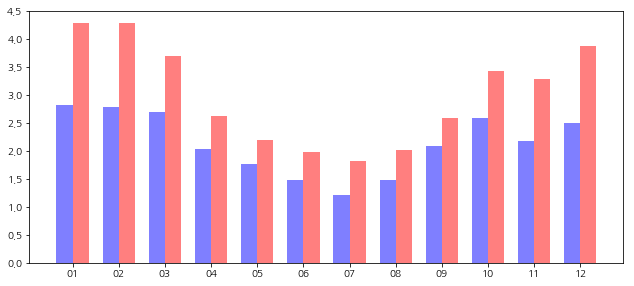

In [6]:
opacity = 0.5
bar_width = 0.35
xticks1 = range(12)
xticks2 = [x+bar_width for x in xticks1]

xticks = [m+bar_width/2. for m in xticks1]
xticks_str = [str(m+1).zfill(2) for m in xticks1]

yticks1 = monthly['trueYield']
yticks2 = monthly['predictYield']

fig, ax = plt.subplots(1, 1)
ax.bar(xticks1, yticks1, color='blue', width=bar_width, alpha=opacity)
ax.bar(xticks2, yticks2, color='red', width=bar_width, alpha=opacity)

ax.set_xticks(xticks)
ax.set_xticklabels(xticks_str)
fig.subplots_adjust(right=1.5, top=1)

## 3. scatter plot

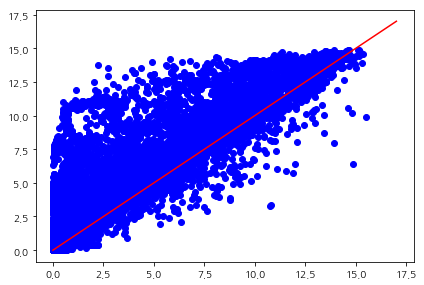

In [7]:
trues = df['trueYield']
preds = df['predictYield']

fig, ax = plt.subplots(1, 1)
ax.scatter(trues, preds, color='blue')
ax.plot(range(18), range(18), color='red')

fig.subplots_adjust(right=1, top=1)

## 4. histogram with confidence interval

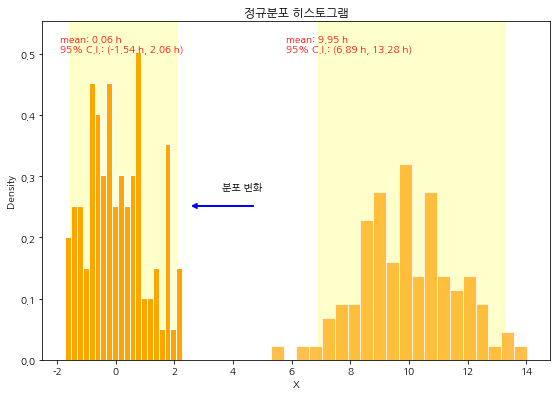

In [8]:
n_bin = 20
opacity = 1

alpha = 0.05
# 오른쪽 분포
dist1 = np.random.normal(10, 1.5, 100)
# 왼쪽 분포
dist2 = np.random.normal(0, 1, 100)

mu1 = np.mean(dist1)
l1 = np.percentile(dist1, (alpha/2)*100)
u1 = np.percentile(dist1, (1-alpha/2)*100)

mu2 = np.mean(dist2)
l2 = np.percentile(dist2, (alpha/2)*100)
u2 = np.percentile(dist2, (1-alpha/2)*100)

# y축 최대 범위
max_val = max(max(np.histogram(dist1, bins=n_bin, normed=True)[0]),
              max(np.histogram(dist2, bins=n_bin, normed=True)[0]))

# 통계량 나타낼 위치
txt_pos1 = dist1.min()*1.1
txt_pos2 = dist2.min()*1.1

fig, ax = plt.subplots(1, 1)
ax.hist(dist1, bins=n_bin, color='orange', normed=True, edgecolor='white', alpha=opacity*0.7)
ax.hist(dist2, bins=n_bin, color='orange', normed=True, edgecolor='white', alpha=opacity)

ax.set_xlabel('X')
ax.set_ylabel('Density')

ax.set_title('정규분포 히스토그램')
ax.set_ylim(0, max_val*1.1)

# 신뢰구간 표기
ax.fill_between((l1, u1), 0, [max_val*1.1, max_val*1.1], color='yellow', alpha=0.2)
ax.fill_between((l2, u2), 0, [max_val*1.1, max_val*1.1], color='yellow', alpha=0.2)

# 요약값 표기
words = 'mean: {:.2f} h\n95% C.I.: ({:.2f} h, {:.2f} h)'
ax.text(txt_pos1, max_val, words.format(mu1, l1, u1), color='red')
ax.text(txt_pos2, max_val, words.format(mu2, l2, u2), color='red')

# 화살표 표기
arrow_from = dist1.min()*0.9
arrow_to = dist2.max()*1.1
arrowprops = {
    'arrowstyle': '->',
    'lw': 2,
    'color': 'blue'
}
ax.annotate('',xy=(arrow_to, max_val/2), xytext=(arrow_from, max_val/2), arrowprops=arrowprops)
ax.text((arrow_to+arrow_from)/2, (max_val/2)*1.1, '분포 변화')
fig.subplots_adjust(right=1.3, top=1.3)